In [1]:
# Import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, warnings
import datetime as dt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the leads file into pandas dataset
leadData = pd.read_csv('Leads.csv', encoding = 'latin')
leadData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# data info
leadData.info()

#has 37 columns and there are missing values in many columns. will need missing values data imputations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#data shape
leadData.shape

#9240 records in the data with 37 columns

(9240, 37)

In [6]:
# null value columns
leadData.isnull().any()

#16 columns have null data

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [7]:
# describe the data for numeric columns
leadData.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check for duplicate records
leadData[leadData.duplicated(keep=False)]

#no duplicate values in the dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [9]:
#few columns have value Select in them which means user did not select any option on the website. we will convert these values to null

leadData['Lead Profile'] = leadData['Lead Profile'].replace('Select', np.nan)
leadData['City'] = leadData['City'].replace('Select', np.nan)
leadData['Specialization'] = leadData['Specialization'].replace('Select', np.nan)
leadData['How did you hear about X Education'] = leadData['How did you hear about X Education'].replace('Select', np.nan)

In [10]:
# missing values treatment
print(round(100*(leadData.isnull().sum()/len(leadData.index)), 2))

# 10 columns have more than 25% null data in the dataset

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Iterate over each column in the dataset for exploratory data analysis of only 1 value in the columns records
for column in leadData.columns:
    # Perform value_count length = 1 task for each column
    print(f"Column: {column}")
    
    # remove columns with length of value_counts = 1, only 1 value for all records
    if len(leadData[column].value_counts()) == 1:
            leadData.drop(column, inplace=True, axis=1)
            print(f"Column dropped due to only 1 value for all the records: {column}")
    print("--------")

# Iterate over each column in the dataset for exploratory data analysis of missing values
for column in leadData.columns:
    # Perform missing value tasks for each column
    print(f"Column: {column}")
    
    # Check for missing data
    missing_data_percentage = round(100*(leadData[column].isnull().sum()/len(leadData.index)), 2)
    if missing_data_percentage > 0:
        print(f"Missing Data: {missing_data_percentage} percentage missing values")
        print("--------Value Counts--------")
        print(leadData[column].value_counts())
    else:
        print("Missing Data: No missing values")
    
    # remove columns with null values more than 30%
    if missing_data_percentage >= 30:
            leadData.drop(column, inplace=True, axis=1)
            print(f"Column dropped due to missing percentage greater than 30: {column}")
   
    print("--------")

# Below Columns dropped due to only 1 value in the column for all the records 
# Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content
# Get updates on DM Content, I agree to pay the amount through cheque

# Below Columns removed due to more than 30% missing values
# Specialization, How did you hear about X Education, Tags, Lead Quality,Lead Profile, City
# Asymmetrique Activity Index, Asmmetrique Profile Index, Asymmetrique Activity Score,  Asymmetrique Profile Score 



Column: Prospect ID
--------
Column: Lead Number
--------
Column: Lead Origin
--------
Column: Lead Source
--------
Column: Do Not Email
--------
Column: Do Not Call
--------
Column: Converted
--------
Column: TotalVisits
--------
Column: Total Time Spent on Website
--------
Column: Page Views Per Visit
--------
Column: Last Activity
--------
Column: Country
--------
Column: Specialization
--------
Column: How did you hear about X Education
--------
Column: What is your current occupation
--------
Column: What matters most to you in choosing a course
--------
Column: Search
--------
Column: Magazine
Column dropped due to only 1 value for all the records: Magazine
--------
Column: Newspaper Article
--------
Column: X Education Forums
--------
Column: Newspaper
--------
Column: Digital Advertisement
--------
Column: Through Recommendations
--------
Column: Receive More Updates About Our Courses
Column dropped due to only 1 value for all the records: Receive More Updates About Our Courses

In [12]:
# missing value treatment for Country
# dropping column Country as 27% missing values and country India dominates the records
# since the other countries are very less it will not cause any issue if we delete this column

leadData.drop("Country", inplace=True, axis=1)

In [13]:
# missing value treatment for Lead Source
# replace null values with Google as it dominates this column
# also replace google with Google

leadData['Lead Source'] = leadData['Lead Source'].replace('google', 'Google')
leadData['Lead Source'] = leadData['Lead Source'].replace(np.nan, 'Google')

In [14]:
# missing value treatment for Total Visits
# replace null values with median as it is numerical column and percentage is less 1.48%


leadData['TotalVisits'] = leadData['TotalVisits'].replace(np.nan, leadData['TotalVisits'].median())

In [15]:
# missing value treatment for Page Views Per Visit
# replace null values with median as it is numerical column and percentage is less 1.48%

leadData['Page Views Per Visit'] = leadData['Page Views Per Visit'].replace(np.nan, leadData['Page Views Per Visit'].median())

In [16]:
# missing value treatment for Last Activity
# replace null values with Unknown (new categorical value) as no other value suitable there from the existing list 
# missing percentage is 1.11

leadData['Last Activity'] = leadData['Last Activity'].replace(np.nan, 'Unknown')

In [17]:
# missing value treatment for What is your current occupation
# replace null values with Unknown (new categorical value) as no other value suitable there from the existing list 
# missing percentage is 29.11

leadData['What is your current occupation'] = leadData['What is your current occupation'].replace(np.nan, 'Unknown')

In [18]:
# missing value treatment for What is your What matters most to you in choosing a course
# missing percentage is 29.32
# based on value counts the value is Better Career Prospects for 6528 records and will not be a significant feature for the model
# this column can be dropped

leadData.drop("What matters most to you in choosing a course", inplace=True, axis=1)

In [19]:
# All columns processed for null values
# recheck all the columns again if any column still has null values

print(round(100*(leadData.isnull().sum()/len(leadData.index)), 2))

# no column now has missing value

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


In [20]:
# check the shape of the dataset after initial EDA treatment
leadData.shape

# 20 columns left now for further EDA processing with 9240 records

(9240, 20)

In [21]:
# get the numeric columns for outlier analysis and treatment
leadData.describe()

# numeric columns below
# Lead Number, Converted, TotalVisits,Total Time Spent on Website,Page Views Per Visit

# Checking outliers at 25%,50%,75%,90%,95% and above
leadData.describe(percentiles=[.25,.5,.75,.90,.95,.99])

# From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


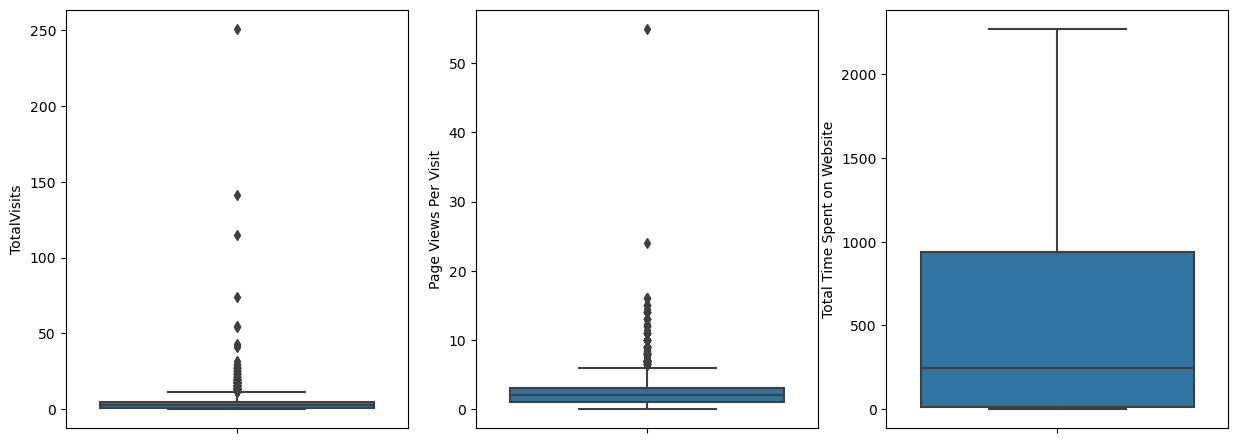

In [22]:
# check box plot visualization for outlier fields

plt.figure(figsize=(15, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = leadData)
plt.subplot(4,3,2)
sns.boxplot(y = 'Page Views Per Visit', data = leadData)
plt.subplot(4,3,3)
sns.boxplot(y = 'Total Time Spent on Website', data = leadData)
plt.show()

# no treatment needed for Total Time Spent on Website
# 99 percentile and above data should be removed as it is outlier data for Total Visits and Total Time Spent on Website

In [23]:
# outlier treatment for TotalVisits

ninetynine_quantile_total_visits = leadData['TotalVisits'].quantile(0.99)
leadData = leadData[leadData["TotalVisits"] < ninetynine_quantile_total_visits]
leadData["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [24]:
# outlier treatment for Page Views Per Visit

ninetynine_quantile_pageviews_visits = leadData['Page Views Per Visit'].quantile(0.99)
leadData = leadData[leadData["Page Views Per Visit"] < ninetynine_quantile_pageviews_visits]
leadData["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [25]:
# columns ProspectID and leadNumber are of no use for the model so better we drop them

leadData.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [26]:
# check the dataset shape after outlier and missing value treatment

leadData.shape

# 9240 records earlier with outliers treatment to 9029 records now
# 211 records deleted due to outlier treament
# 18 columns present now

(9029, 18)

In [27]:
# univariate, bivariate and multi variate analysis
# Target variable Converted univariate analysis

converted = (sum(leadData['Converted'])/len(leadData['Converted'].index))*100
print(converted)

# 38.50 % conversion present in the existing data

38.50924797873519


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

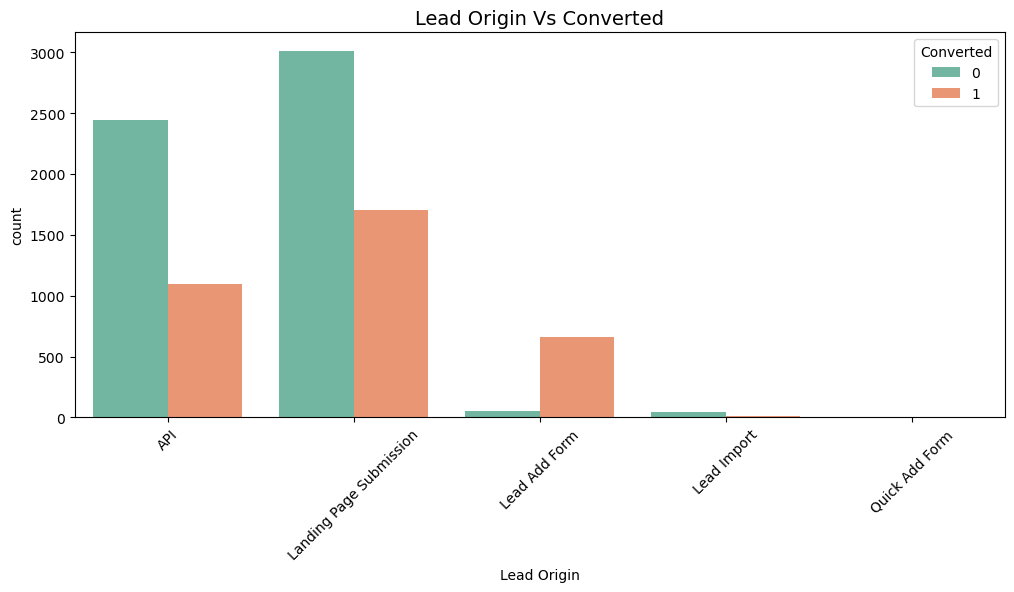

In [28]:
#multivariate analysis of Lead Origin with Conversions

plt.figure(figsize=(12,5))
plt.title('Lead Origin Vs Converted', fontsize = 14)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# sales focus should be on leads from Landing page and API
# Lead add form has the highest conversion rate 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'Social Media'),
  Text(12, 0, 'WeLearn'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'Live Chat'),
  Text(15, 0, 'welearnblog_Home'),
  Text(16, 0, 'youtubechannel'),
  Text(17, 0, 'testone'),
  Text(18, 0, 'Press_Release'),
  Text(19, 0, 'NC_EDM')])

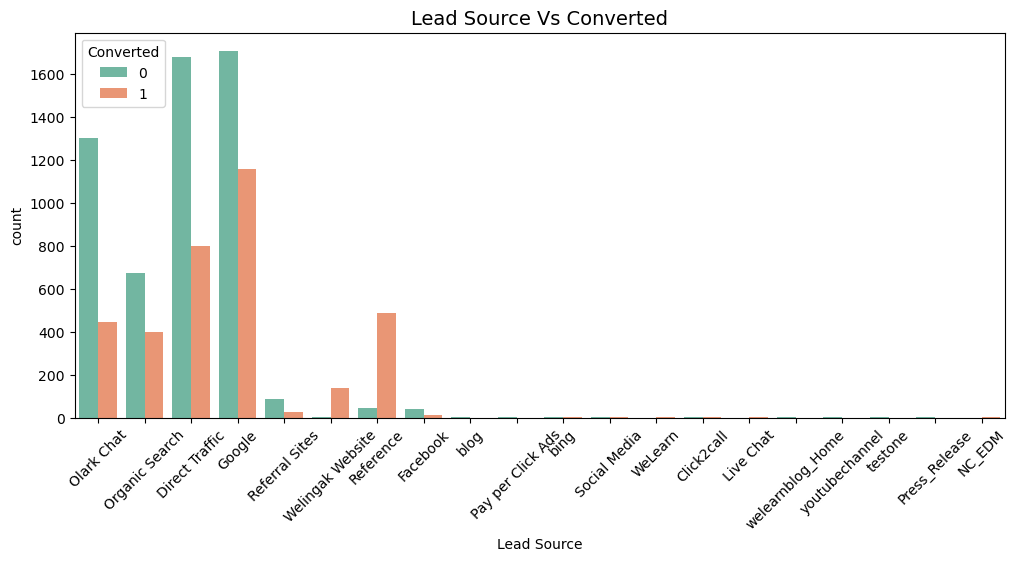

In [29]:
#multivariate analysis of Lead Source with Conversions
# take the categorical columns first

plt.figure(figsize=(12,5))
plt.title('Lead Source Vs Converted', fontsize = 14)
sns.countplot(x = "Lead Source", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)


In [30]:
# Lead Source column has many categories with very less data.. we can create an others for those values.

leadData['Lead Source'] = leadData['Lead Source'].replace(['Press_Release','Click2call' , 'Social Media', 'WeLearn', 'bing', 'blog', 'NC_EDM', 'Pay per Click Ads', 'testone', 'welearnblog_Home', 'youtubechannel', 'Live Chat'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

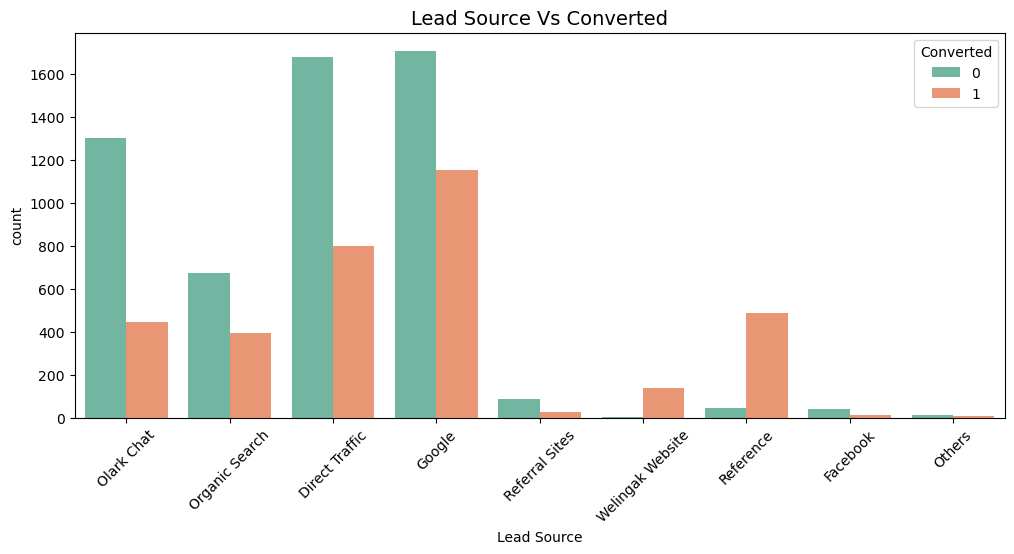

In [31]:
# again doing the analysis for Lead Source with conversion

plt.figure(figsize=(12,5))
plt.title('Lead Source Vs Converted', fontsize = 14)
sns.countplot(x = "Lead Source", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# reference category has a very high conversion rate
# welingak website also has a high conversion rate
# lot of leads from Google, Direct Traffic, organic search and olark chat. conversion rate is there but can be improved.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

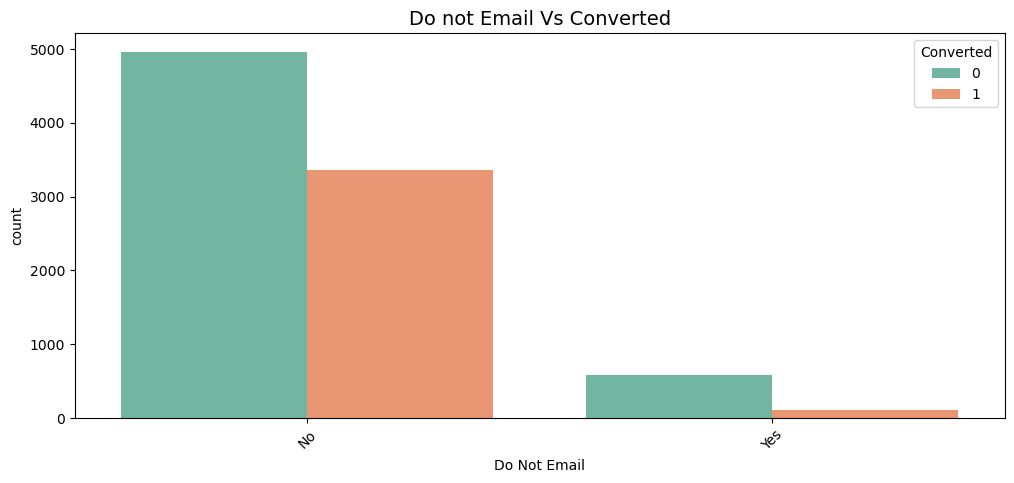

In [32]:
# multivariate analysis of Do not email with Conversions

plt.figure(figsize=(12,5))
plt.title('Do not Email Vs Converted', fontsize = 14)
sns.countplot(x = "Do Not Email", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# most entries are with value No. But does not infer anything as lead conversion also present with No values. does not seem to be a relavant parameter for model

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

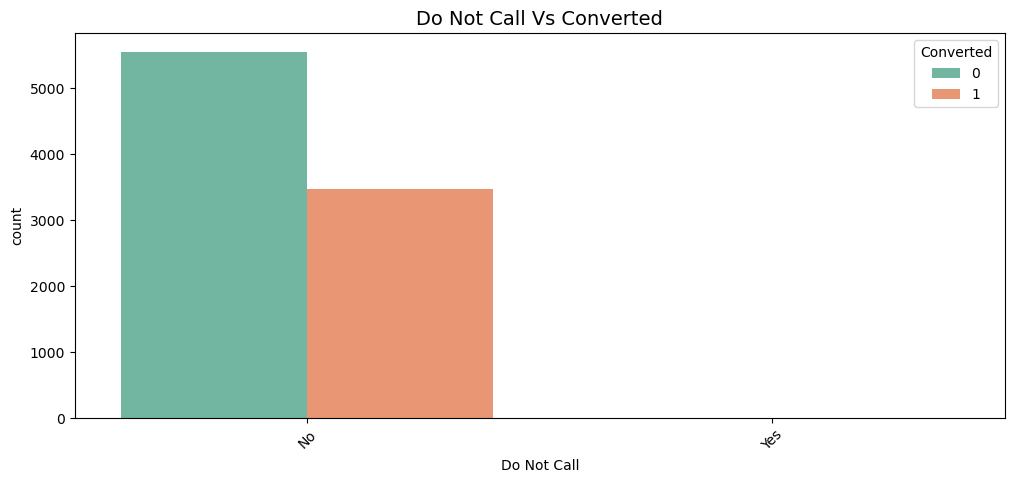

In [33]:
# multivariate analysis of Do not call with Conversions

plt.figure(figsize=(12,5))
plt.title('Do Not Call Vs Converted', fontsize = 14)
sns.countplot(x = "Do Not Call", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# All entries are with value No. But does not infer anything as lead conversion also present with No values. does not seem to be a relavant parameter for model

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'Unknown'),
  Text(12, 0, 'Approached upfront'),
  Text(13, 0, 'SMS Sent'),
  Text(14, 0, 'Visited Booth in Tradeshow'),
  Text(15, 0, 'Resubscribed to emails'),
  Text(16, 0, 'Email Received'),
  Text(17, 0, 'Email Marked Spam')])

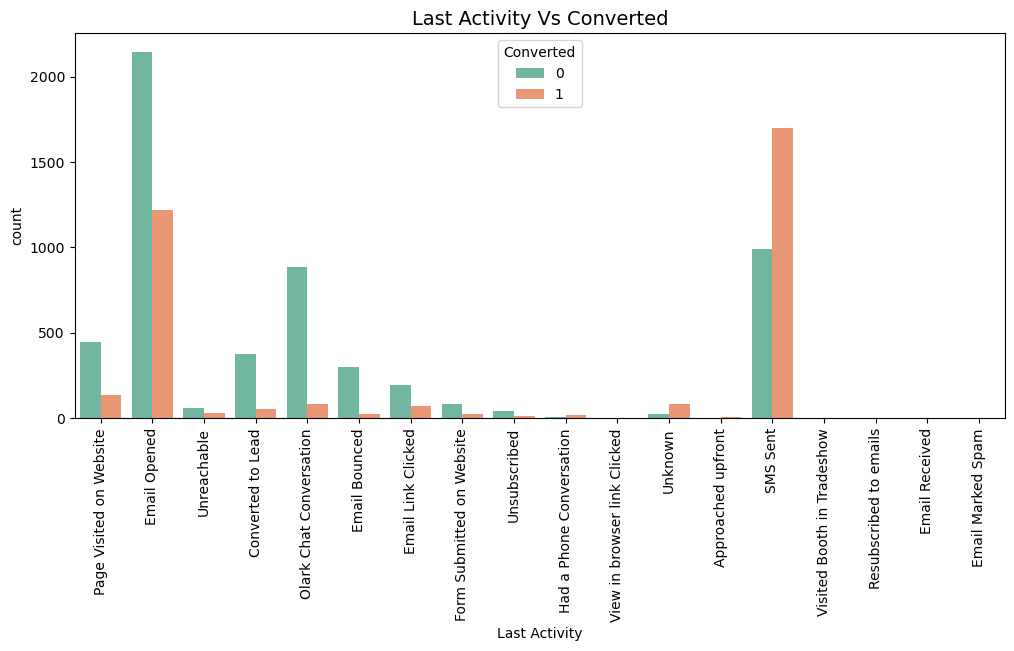

In [34]:
# multivariate analysis of Last Activity with Conversions

plt.figure(figsize=(12,5))
plt.title('Last Activity Vs Converted', fontsize = 14)
sns.countplot(x = "Last Activity", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 90)

In [35]:
# Last Activity column has many categories with very less data.. we can create an others for those values.
leadData['Last Activity'] = leadData['Last Activity'].replace(['Had a Phone Conversation','Email Marked Spam', 'View in browser link Clicked',  'Email Received','Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails'], 'Other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other'),
  Text(10, 0, 'Unknown'),
  Text(11, 0, 'SMS Sent')])

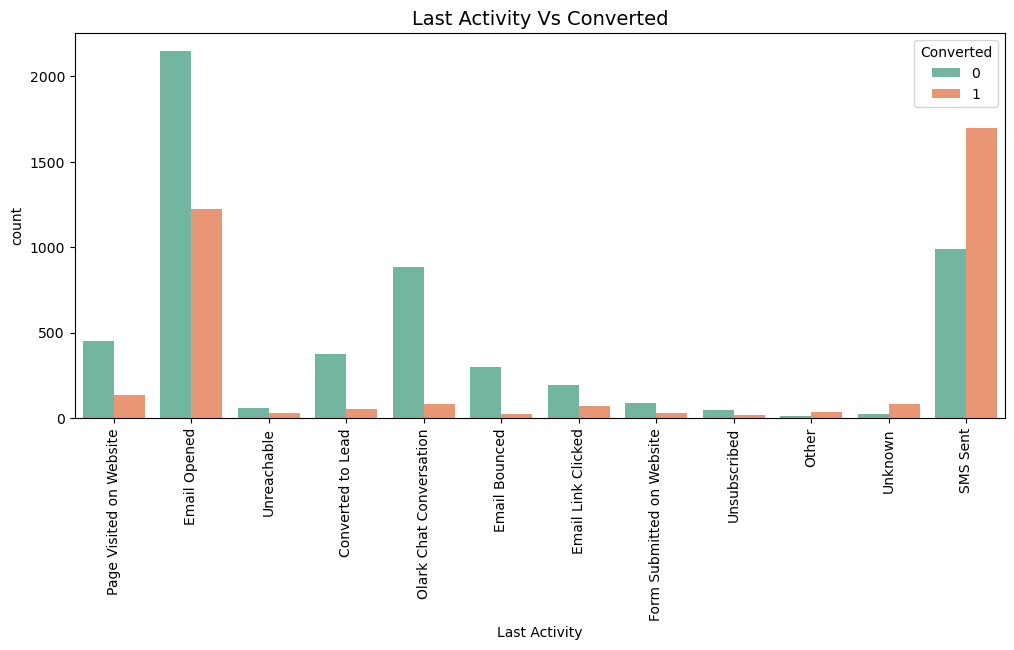

In [36]:
# multivariate analysis of Last Activity with Conversions again 

plt.figure(figsize=(12,5))
plt.title('Last Activity Vs Converted', fontsize = 14)
sns.countplot(x = "Last Activity", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 90)

# email opened is the last activity for may leads.
# conversion rate with the SMS open last activity is very high

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Working Professional'),
  Text(4, 0, 'Businessman'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Housewife')])

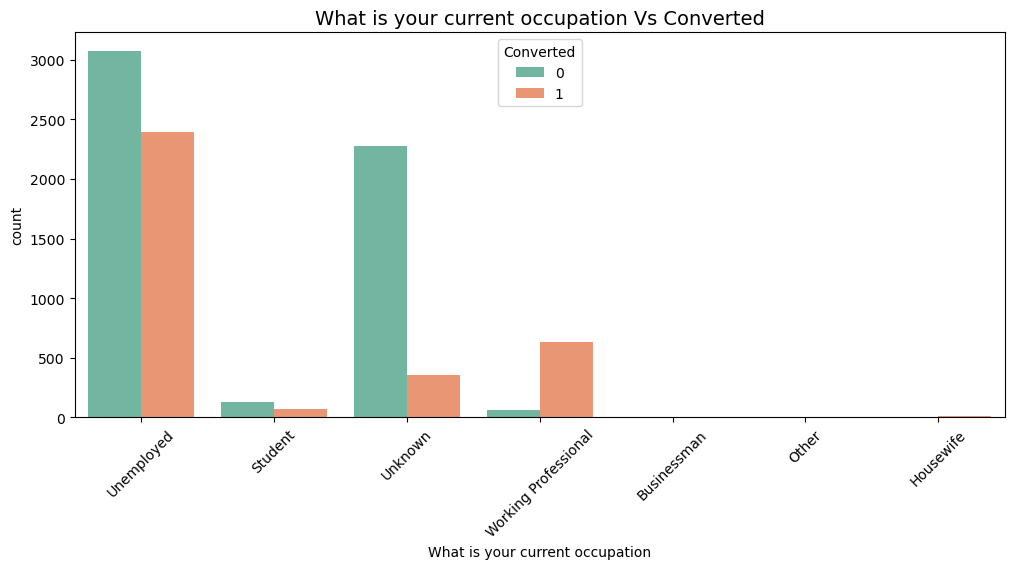

In [37]:
# multivariate analysis of What is your current occupation with Conversions

plt.figure(figsize=(12,5))
plt.title('What is your current occupation Vs Converted', fontsize = 14)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate with Working professionals is higher
# many leads in unemployed and unknown category
# conversion rate with unemployed and student category is good compared to number of leads

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

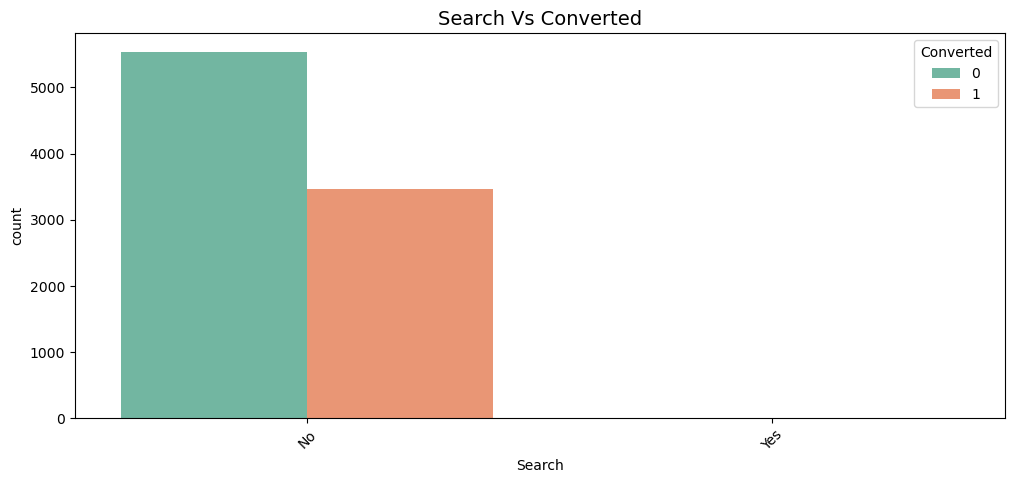

In [38]:
# multivariate analysis of Search with Conversions

plt.figure(figsize=(12,5))
plt.title('Search Vs Converted', fontsize = 14)
sns.countplot(x = "Search", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate is higher on leads who are not through search. no specific inference

(array([0]), [Text(0, 0, 'No')])

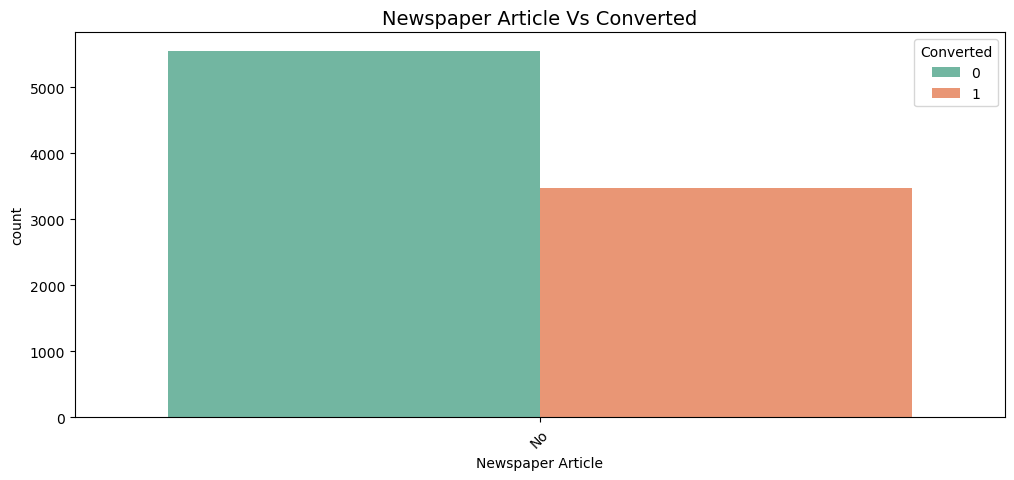

In [39]:
# multivariate analysis of Newspaper Article with Conversions

plt.figure(figsize=(12,5))
plt.title('Newspaper Article Vs Converted', fontsize = 14)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate is higher on leads who are not through Newspaper Article.no specific inference

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

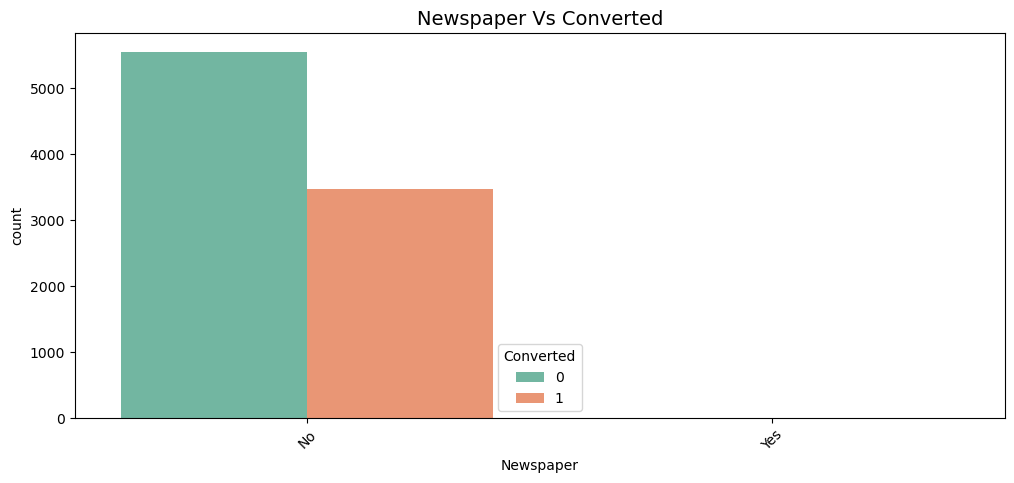

In [40]:
# multivariate analysis of Newspaper with Conversions

plt.figure(figsize=(12,5))
plt.title('Newspaper Vs Converted', fontsize = 14)
sns.countplot(x = "Newspaper", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate is higher on leads who are not through Newspaper .no specific inference

(array([0]), [Text(0, 0, 'No')])

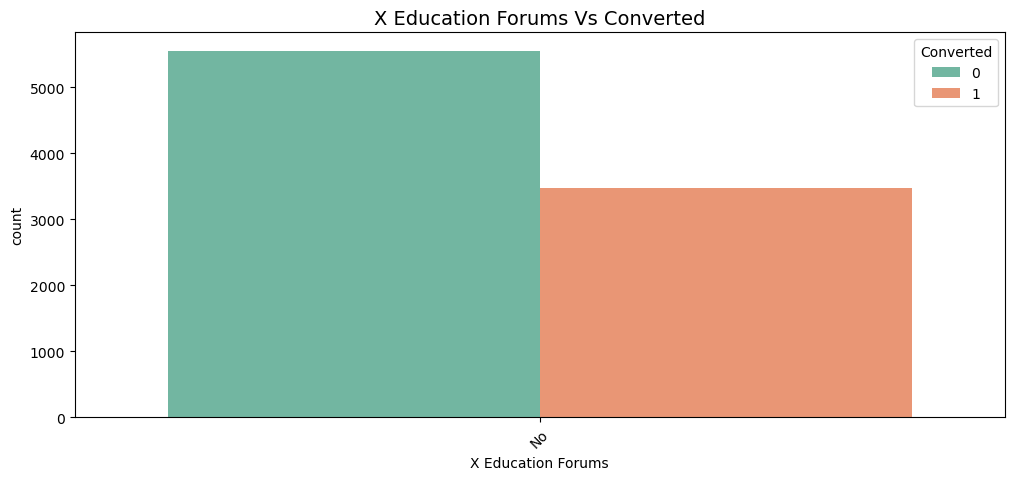

In [41]:
# multivariate analysis of X Education Forums with Conversions

plt.figure(figsize=(12,5))
plt.title('X Education Forums Vs Converted', fontsize = 14)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate is higher on leads who are not through X Education Forums .no specific inference.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

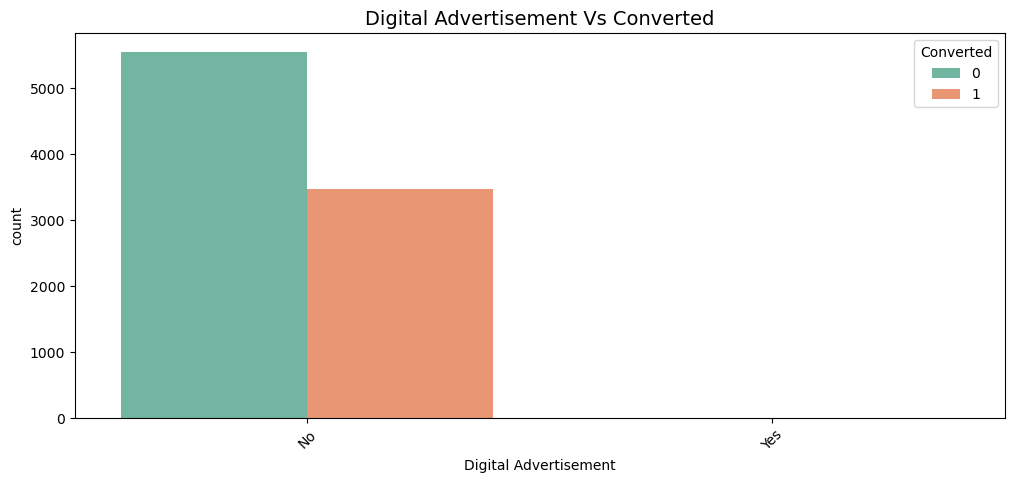

In [42]:
# multivariate analysis of Digital Advertisement with Conversions

plt.figure(figsize=(12,5))
plt.title('Digital Advertisement Vs Converted', fontsize = 14)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate is higher on leads who are not through Digital Advertisement .no specific inference.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

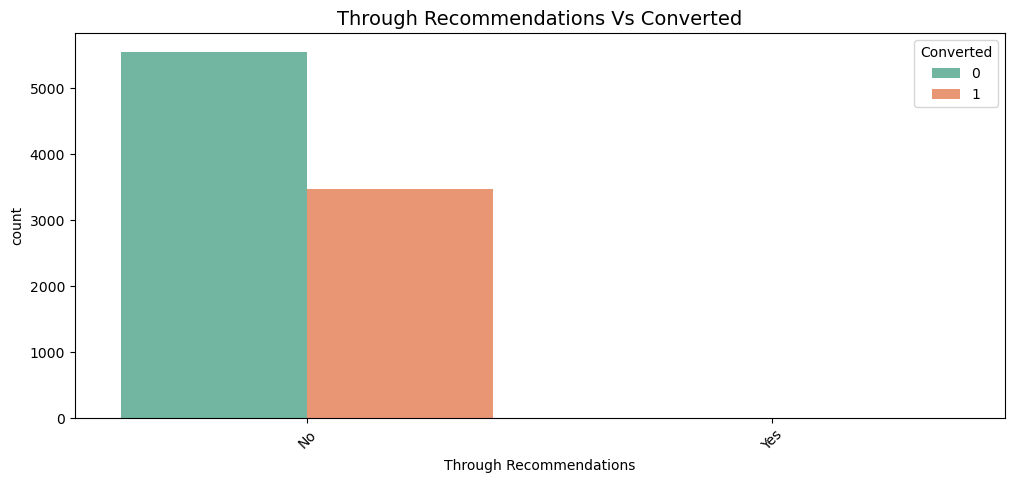

In [43]:
# multivariate analysis of Through Recommendations with Conversions

plt.figure(figsize=(12,5))
plt.title('Through Recommendations Vs Converted', fontsize = 14)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# conversion rate is higher on leads who are not through Through Recommendations .no specific inference.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

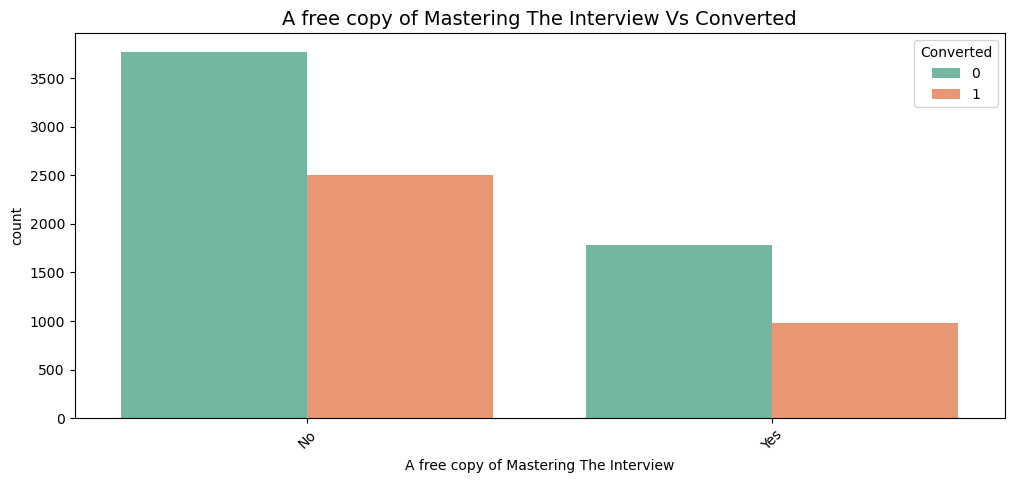

In [44]:
# multivariate analysis of A free copy of Mastering The Interview with Conversions

plt.figure(figsize=(12,5))
plt.title('A free copy of Mastering The Interview Vs Converted', fontsize = 14)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 45)

# no specific inference
# leads are generated in both cases and the conversion rate is same for both yes and no

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

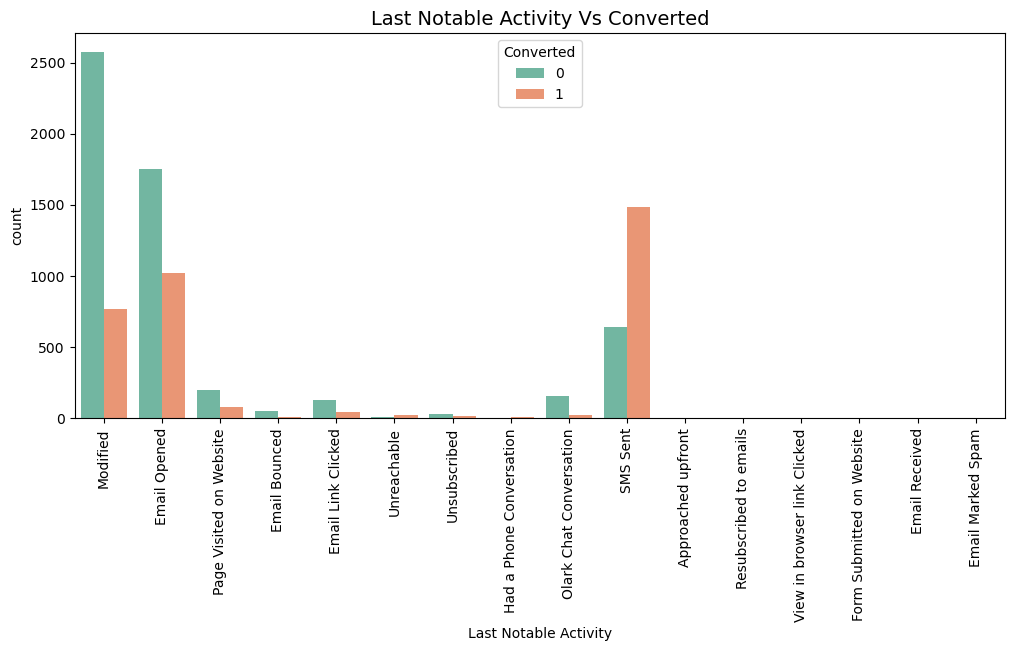

In [45]:
# multivariate analysis of Last Notable Activity with Conversions

plt.figure(figsize=(12,5))
plt.title('Last Notable Activity Vs Converted', fontsize = 14)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 90)


In [46]:
# Last notable Activity column has many categories with very less data.. we can create an others for those values.

leadData['Last Notable Activity'] = leadData['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails', 'View in browser link Clicked',  'Email Received',
                                                       'Form Submitted on Website', 'Email Marked Spam'], 'Other')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Other')])

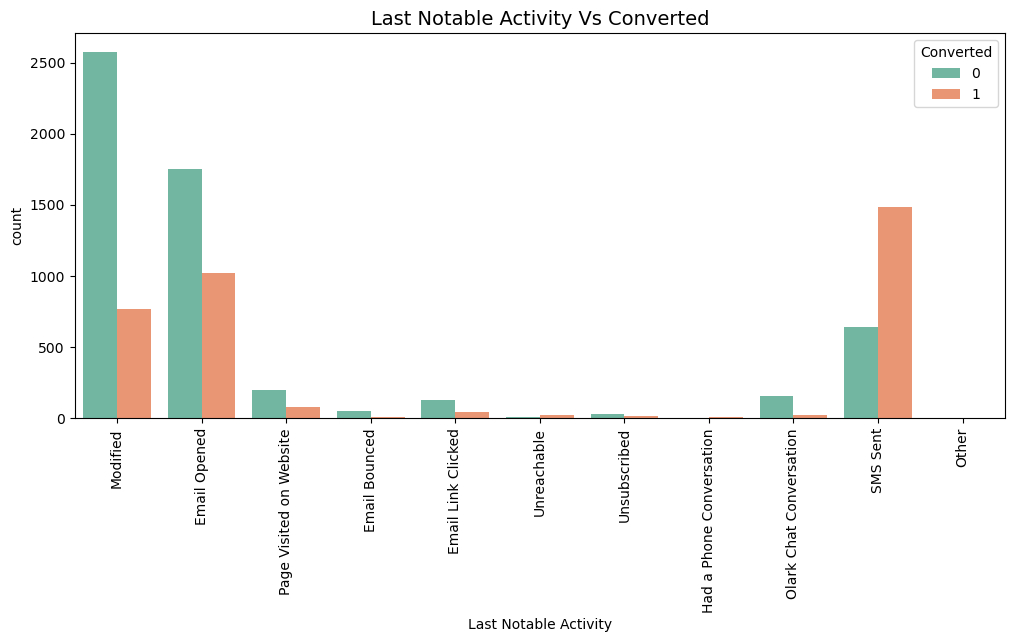

In [ ]:
# multivariate analysis of Last Notable Activity with Conversions again

plt.figure(figsize=(12,5))
plt.title('Last Notable Activity Vs Converted', fontsize = 14)
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leadData, palette='Set2')
plt.xticks(rotation = 90)

# conversion rate is high for SMS sent.

In [ ]:
# multi variate analysis with numeric variables and converted

plt.figure(figsize=(18,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadData)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadData)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadData)
plt.show()

# conversion rates are higher when the total time spent on the website is higher
# total visits also has a slight impact on the conversion rate
# conversion rate is not impactful with page views per visit

In [ ]:
# checking few columns again which did not give any specific inference

leadData["Do Not Email"].value_counts()
leadData["Do Not Call"].value_counts() # can drop this column as 9027 records have No as the value
leadData["Search"].value_counts() # can drop this column as 9016 records have No as the value
leadData["Newspaper Article"].value_counts() # can drop this column as all records have No as the value
leadData["X Education Forums"].value_counts() # can drop this column as all records have No as the value
leadData["Newspaper"].value_counts() # can drop this column as 9028 records have No as the value
leadData["Digital Advertisement"].value_counts() # can drop this column as 9028 records have No as the value
leadData["Through Recommendations"].value_counts() # can drop this column as 9023 records have No as the value

In [ ]:
# dropping above columns which will not help in the model building as per above value counts analysis
leadData.drop(["Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"], inplace=True, axis=1)

In [ ]:
# check the final shape and columns present for the model building
print("Final shape of the dataset for the model building")
print(leadData.shape)
print("Final columns of the dataset for the model building")
print(leadData.columns)

In [ ]:
# data preparation for model building
# check the values in the final model features

for column in leadData.columns:
    print(f"Column: {column}")
    print(leadData[column].value_counts())
    print("--------")

In [ ]:
# 2 columns with yes-no values should be converted to 1 and 0 - A free copy of Mastering The Interview and Do Not Email

# Defining the map function for yes-no conversion
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
variablesYesNo =  ['Do Not Email', 'A free copy of Mastering The Interview']

leadData[variablesYesNo] = leadData[variablesYesNo].apply(binary_map)

In [ ]:
# creating dummy variables for the categorical data features
# concat the dummy data to original data
# drop the original columns

dummy_data = pd.get_dummies(leadData[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)
leadData = pd.concat([leadData, dummy_data], axis=1)
leadData.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'], axis = 1, inplace= True)
leadData.head()

In [ ]:
# the model data is almost final now to be given for model training.
# check for null values and value counts to check if everything fine
# check the final dataset shape 

for column in leadData.columns:
    print(f"Column: {column}")
    missing_data_percentage = round(100*(leadData[column].isnull().sum()/len(leadData.index)), 2)
    print(f"missing values percentage")
    print (missing_data_percentage)
    print(f"value counts")
    print (leadData[column].value_counts())
    print(f"---------------------------------------------")

print(leadData.shape)

# 9029 records and 45 features for the model building

In [ ]:
# Start Test Train Split
# Get the converted column in y variable
# get the entire dataset minus converted column in X variable
# split into train test data for training and evaluation with 70-30 ratio

y = leadData["Converted"]
X = leadData.drop(['Converted'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Min Max Scaling
# Scale the Xtrain numerical features with Mix Max scaling

scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

In [ ]:
# Feature Selection using RFE methodology
# Running RFE with 20 variables

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
# check the 20 features selected by the RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]

In [ ]:
# Model 1
# Start the Model building process
# assessing the model using stats model
# add constant to the Train dataset

X_train_sm = sm.add_constant(X_train[cols])

# create the first model using stats modelbinomial logit model
logregModel1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_logregModel1 = logregModel1.fit()
result_logregModel1.summary()


In [ ]:
# since the column What is your current occupation_Housewife has high pvalue and erroneous other values we should remove it from the model features

cols = cols.drop("What is your current occupation_Housewife")

In [ ]:
# Model 2
# Train the model again after dropping the What is your current occupation_Housewife feature

X_train_sm = sm.add_constant(X_train[cols])
logregModel2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_logregModel2 = logregModel2.fit()
result_logregModel2.summary()

In [ ]:
# since the column Lead Source_Reference has high pvalue we should remove it from the model features

cols = cols.drop("Lead Source_Reference")

In [ ]:
# Model 3
# Train the model again after dropping the Lead Source_Reference feature

X_train_sm = sm.add_constant(X_train[cols])
logregModel3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_logregModel3 = logregModel3.fit()
result_logregModel3.summary()

In [ ]:
# since the column Last Notable Activity_Had a Phone Conversation has high pvalue (>0.05) we should remove it from the model features

cols = cols.drop("Last Notable Activity_Had a Phone Conversation")

In [ ]:
# Model 4
# Train the model again after dropping the Last Notable Activity_Had a Phone Conversation feature

X_train_sm = sm.add_constant(X_train[cols])
logregModel4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_logregModel4 = logregModel4.fit()
result_logregModel4.summary()

# After model 4 build all the pvalues are less than 0.05 and looks to be a good model with pvalues
# check for VIN now

In [ ]:
# check for collinearity with variance inflation factor methodology
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# since the column Last Notable Activity_Email Opened has high VIN we should remove it from the model features

cols = cols.drop("Last Notable Activity_Email Opened")

In [ ]:
# Model 5
# Train the model again after dropping theLast Notable Activity_Email Opened feature

X_train_sm = sm.add_constant(X_train[cols] )
logregModel5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_logregModel5 = logregModel5.fit()
result_logregModel5.summary()

In [ ]:
# check for collinearity with variance inflation factor methodology again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# since the column Page Views Per Visit has high VIN we should remove it from the model features

cols = cols.drop("Page Views Per Visit")

In [ ]:
# Model 6
# Train the model again after dropping the Page Views Per Visit feature

X_train_sm = sm.add_constant(X_train[cols] )
logregModel6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result_logregModel6 = logregModel6.fit()
result_logregModel6.summary()

In [ ]:
# check for collinearity with variance inflation factor methodology again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Final Model - Model 6
# Model 6 is a good model as VIN for all features is below 5 and pvalue for all features is less than 0.05
# Lets proceed with calculating the accuracy now with Model 6 and then reivisit if we need more model optimization